###  In this project we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# display al the rows and columns of the data
pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Import all the datasets
churn_data = pd.read_csv('churn_data.csv', encoding = ('iso-8859-1'))
customer_data = pd.read_csv('customer_data.csv', encoding = ('iso-8859-1'))
internet_data = pd.read_csv('internet_data.csv', encoding = ('iso-8859-1'))

In [3]:
# combining all data files into one consolidated dataframe
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

# final df
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


    1	CustomerID 	      The unique ID of each customer
    2	Gender 	          The gender of a person
    3	SeniorCitizen	  Whether a customer can be classified as a senior citizen.
    4	Partner 	      If a customer is married/ in a live-in relationship.
    5	Dependents	      If a customer has dependents (children/ retired parents)
    6	Tenure	          The time for which a customer has been using the service.
    7	PhoneService  	  Whether a customer has a landline phone service along with the internet service.
    8	MultipleLines	  Whether a customer has multiple lines of internet connectivity.
    9	InternetService   The type of internet services chosen by the customer.
    10	OnlineSecurity 	  Specifies if a customer has online security.
    11	OnlineBackup 	  Specifies if a customer has online backup.
    12	DeviceProtection  Specifies if a customer has opted for device protection.
    13	TechSupport 	  Whether a customer has opted for tech support of not.
    14	StreamingTV	      Whether a customer has an option of TV streaming.
    15	StreamingMovies   Whether a customer has an option of Movie streaming.
    16	Contract  	      The type of contract a customer has chosen.
    17	PaperlessBilling  Whether a customer has opted for paperless billing.
    18	PaymentMethod 	  Specifies the method by which bills are paid.
    19	MonthlyCharges 	  Specifies the money paid by a customer each month.
    20	TotalCharges 	  The total money paid by the customer to the company.
    21	Churn  	          This is the target variable which specifies if a customer has churned or not.

In [4]:
telecom.shape

(7043, 21)

In [5]:
# check the data type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

The data has many features with dtype='object' which we need to convert to numeric dtype

In [6]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [7]:
# checking the Features multi-category
print(telecom['OnlineSecurity'].value_counts())
print(telecom['OnlineBackup'].value_counts())
print(telecom['DeviceProtection'].value_counts())
print(telecom['TechSupport'].value_counts())
print(telecom['StreamingTV'].value_counts())
print(telecom['StreamingMovies'].value_counts())
print(telecom['Contract'].value_counts())
print(telecom['PaymentMethod'].value_counts())
print(telecom['MultipleLines'].value_counts())
print(telecom['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
No                  339

In [8]:
# Creating dummy variables and dropping the original columns
OnlineSecurity = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
telecom = pd.concat([telecom,OnlineSecurity], axis=1)
telecom = telecom.drop('OnlineSecurity', axis=1)

OnlineBackup = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
telecom = pd.concat([telecom,OnlineBackup], axis=1)
telecom = telecom.drop('OnlineBackup', axis=1)

DeviceProtection = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
telecom = pd.concat([telecom,DeviceProtection], axis=1)
telecom = telecom.drop('DeviceProtection', axis=1)

TechSupport = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport', drop_first=True)
telecom = pd.concat([telecom,TechSupport], axis=1)
telecom = telecom.drop('TechSupport', axis=1)

StreamingTV = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV', drop_first=True)
telecom = pd.concat([telecom,StreamingTV], axis=1)
telecom = telecom.drop('StreamingTV', axis=1)

StreamingMovies = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies', drop_first=True)
telecom = pd.concat([telecom,StreamingMovies], axis=1)
telecom = telecom.drop('StreamingMovies', axis=1)

Contract = pd.get_dummies(telecom['Contract'], prefix='Contract')
telecom = pd.concat([telecom,Contract], axis=1)
telecom = telecom.drop('Contract', axis=1)

PaymentMethod = pd.get_dummies(telecom['PaymentMethod'], prefix='PaymentMethod')
telecom = pd.concat([telecom,PaymentMethod], axis=1)
telecom = telecom.drop('PaymentMethod', axis=1)

MultipleLines = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines', drop_first=True)
telecom = pd.concat([telecom,MultipleLines], axis=1)
telecom = telecom.drop('MultipleLines', axis=1)

InternetService = pd.get_dummies(telecom['InternetService'], prefix='InternetService')
telecom = pd.concat([telecom,InternetService], axis=1)
telecom = telecom.drop('InternetService', axis=1)

In [9]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,No,Yes,29.85,29.85,No,Female,0,Yes,No,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,34,Yes,No,56.95,1889.5,No,Male,0,No,No,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,Yes,Yes,53.85,108.15,Yes,Male,0,No,No,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,No,No,42.30,1840.75,No,Male,0,No,No,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
4,9237-HQITU,2,Yes,Yes,70.70,151.65,Yes,Female,0,No,No,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [10]:
# check the Yes/No features
print(telecom['PhoneService'].value_counts())
print(telecom['Partner'].value_counts())
print(telecom['Dependents'].value_counts())
print(telecom['Churn'].value_counts())
print(telecom['PaperlessBilling'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
No     5174
Yes    1869
Name: Churn, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


In [11]:
# lable encoding the following Yes/No features ['PhoneService', 'Partner', 'Dependents', 'Churn']
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

telecom['PhoneService'] = LE.fit_transform(telecom['PhoneService']) # 0=No, 1=Yes
telecom['Partner'] = LE.fit_transform(telecom['Partner']) # 0=No, 1=Yes
telecom['Dependents'] = LE.fit_transform(telecom['Dependents']) # 0=No, 1=Yes
telecom['Churn'] = LE.fit_transform(telecom['Churn']) # 0=No, 1=Yes
telecom['PaperlessBilling'] = LE.fit_transform(telecom['PaperlessBilling']) # 0=No, 1=Yes
telecom['gender'] = LE.fit_transform(telecom['gender'])  # 0=Female, 1=male

In [12]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [13]:
telecom.filter(regex='No internet service').columns

Index(['OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service'],
      dtype='object')

In [14]:
# dropping columns that has 'No internet service' in its name since we have a variable 'InternetService'
telecom = telecom.drop(['OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service',
       'OnlineSecurity_No internet service'], axis=1)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [16]:
telecom = telecom.drop('customerID', axis=1)
telecom.head(2)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,34,1,0,56.95,1889.5,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


In [17]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int32
PaperlessBilling                           7043 non-null int32
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null object
Churn                                      7043 non-null int32
gender                                     7043 non-null int32
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int32
Dependents                                 7043 non-null int32
OnlineSecurity_Yes                         7043 non-null uint8
OnlineBackup_Yes                           7043 non-null uint8
DeviceProtection_Yes                       7043 non-null uint8
TechSupport_Yes                            7043 non-null uint8
Streamin

Only one feature that is 'TotalCharges' needs to be converted to numeric dtype.                            

In [18]:
# converting 'TotalCharges' to numeric. The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors = 'coerce')

In [19]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int32
PaperlessBilling                           7043 non-null int32
MonthlyCharges                             7043 non-null float64
TotalCharges                               7032 non-null float64
Churn                                      7043 non-null int32
gender                                     7043 non-null int32
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int32
Dependents                                 7043 non-null int32
OnlineSecurity_Yes                         7043 non-null uint8
OnlineBackup_Yes                           7043 non-null uint8
DeviceProtection_Yes                       7043 non-null uint8
TechSupport_Yes                            7043 non-null uint8
Streami

All the features are now numeric

In [20]:
# Lets check for missing data
telecom.isnull().sum()

tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
OnlineSecurity_Yes                          0
OnlineBackup_Yes                            0
DeviceProtection_Yes                        0
TechSupport_Yes                             0
StreamingTV_Yes                             0
StreamingMovies_Yes                         0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check    

In [21]:
# % of missing data
round(100*(telecom.isnull().sum() / len(telecom.index)), 2)

tenure                                     0.00
PhoneService                               0.00
PaperlessBilling                           0.00
MonthlyCharges                             0.00
TotalCharges                               0.16
Churn                                      0.00
gender                                     0.00
SeniorCitizen                              0.00
Partner                                    0.00
Dependents                                 0.00
OnlineSecurity_Yes                         0.00
OnlineBackup_Yes                           0.00
DeviceProtection_Yes                       0.00
TechSupport_Yes                            0.00
StreamingTV_Yes                            0.00
StreamingMovies_Yes                        0.00
Contract_Month-to-month                    0.00
Contract_One year                          0.00
Contract_Two year                          0.00
PaymentMethod_Bank transfer (automatic)    0.00
PaymentMethod_Credit card (automatic)   

As the percentage of missing values is very low, lets drop those observations from our analysis.

In [39]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [42]:
telecom.isnull().sum()

tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
OnlineSecurity_Yes                         0
OnlineBackup_Yes                           0
DeviceProtection_Yes                       0
TechSupport_Yes                            0
StreamingTV_Yes                            0
StreamingMovies_Yes                        0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMet

Now, the data has no missing values.

In [43]:
## Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom = telecom[['tenure', 'MonthlyCharges', 'TotalCharges']]
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000


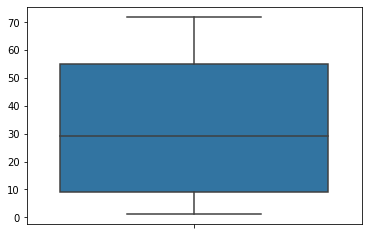

In [67]:
# lets visualise and check for outliers in these variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=telecom[['tenure']])

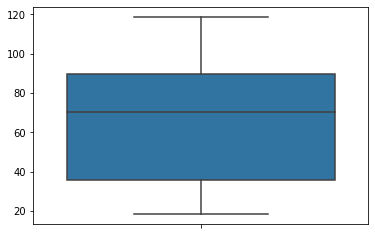

In [51]:
sns.boxplot(y=telecom[['MonthlyCharges']])

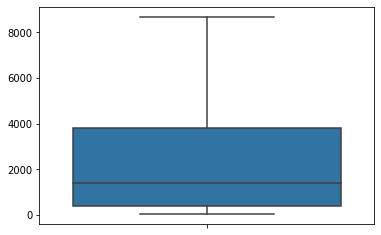

In [52]:
sns.boxplot(y=telecom[['TotalCharges']])

Hence, there are no outliers

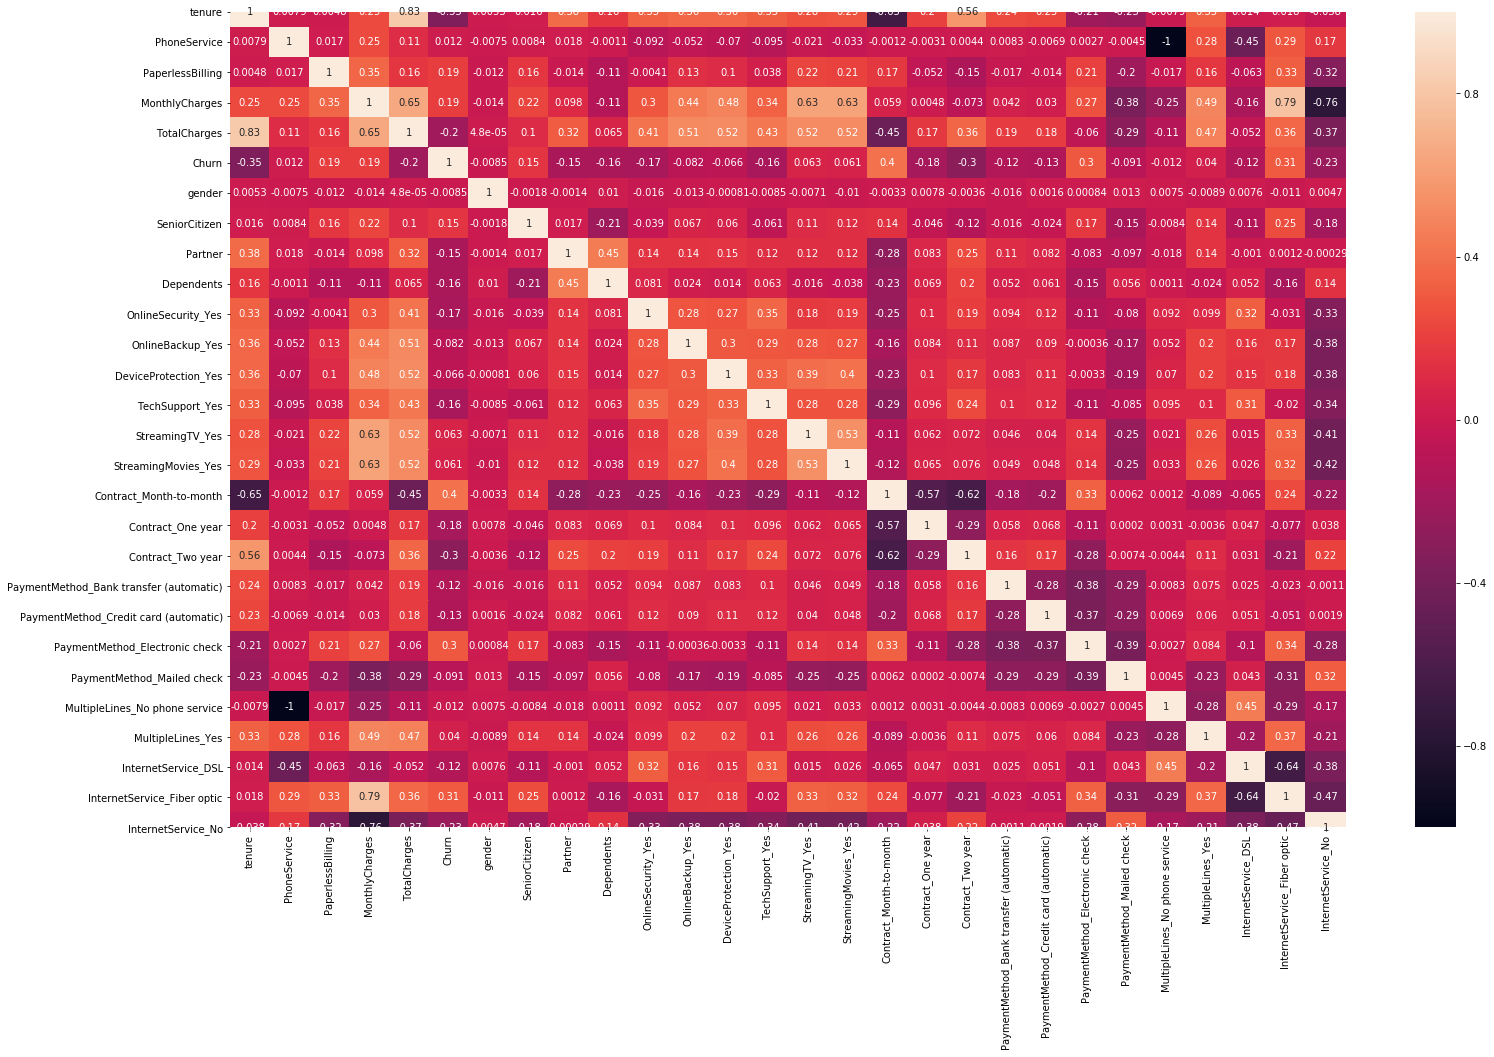

In [68]:
# checking multicolinearity
plt.figure(figsize = (25,15))
sns.heatmap(telecom.corr(), annot=True)

In [72]:
telecom.corr()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
tenure,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.005285,0.015683,0.381912,0.163386,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181,-0.007877,0.332399,0.013786,0.017930,-0.037529
PhoneService,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,-0.007515,0.008392,0.018397,-0.001078,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,-1.000000,0.279530,-0.452255,0.290183,0.171817
PaperlessBilling,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,-0.011902,0.156258,-0.013957,-0.110131,-0.004051,0.127056,0.104079,0.037536,0.224241,0.211583,0.168296,-0.052278,-0.146281,-0.017469,-0.013726,0.208427,-0.203981,-0.016696,0.163746,-0.063390,0.326470,-0.320592
MonthlyCharges,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,-0.013779,0.219874,0.097825,-0.112343,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568,-0.248033,0.490912,-0.161368,0.787195,-0.763191
TotalCharges,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.000048,0.102411,0.319072,0.064653,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867,-0.446776,0.170569,0.358036,0.186119,0.182663,-0.060436,-0.294708,-0.113008,0.469042,-0.052190,0.360769,-0.374878
Churn,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,-0.008545,0.150541,-0.149982,-0.163128,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773,-0.011691,0.040033,-0.124141,0.307463,-0.227578
gender,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545,1.000000,-0.001819,-0.001379,0.010349,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199,0.007515,-0.008883,0.007584,-0.011189,0.004745
SeniorCitizen,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,-0.001819,1.000000,0.016957,-0.210550,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,-0.008392,0.142996,-0.108276,0.254923,-0.182519
Partner,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,-0.018397,0.142561,-0.001043,0.001235,-0.000286
Dependents,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,0.010349,-0.210550,0.452269,1.000000,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,0.001078,-0.024307,0.051593,-0.164101,0.138383
